In [31]:
import re
import os
import json

In [5]:
load_tests("./data/mold_test_imgs/")

TypeError: __init__() got an unexpected keyword argument 'id'

In [ ]:
import configparser

# Loads the config file passed in as a parameter
def load_config(config_file):
    config = configparser.ConfigParser()
    config.read(config_file)
    return config

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
cmaps = ['gray', 'blue']
chs = [1,2,3,4,5]
if len(cmaps) < len(chs):
    cmaps += [cmaps[-1]] * (len(chs) - len(cmaps))
cmaps

['gray', 'blue', 'blue', 'blue', 'blue']

In [120]:
from importlib import reload
import encasm.env
reload(encasm.env)
from encasm.env import PetriDish

In [121]:
test_env = PetriDish.from_config_file("test", "./encasm/configs/default_config.ini")

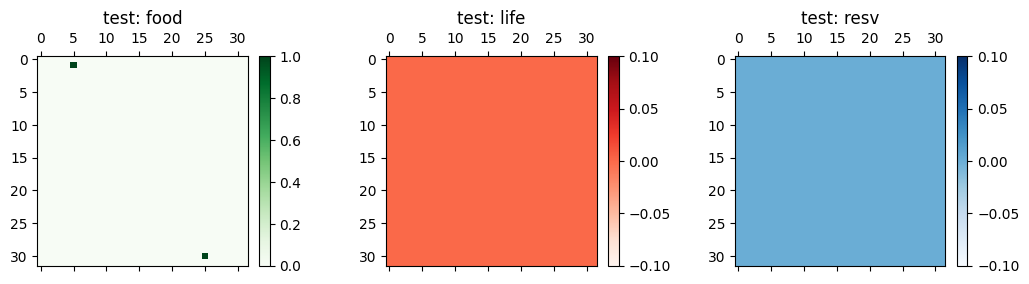

In [122]:
test_env.generate_food()

test_env.display()

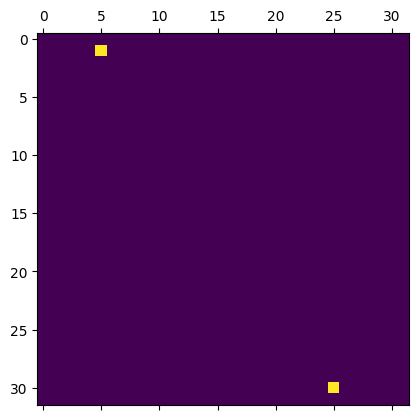

In [142]:
test_env.food = np.random.rand(32,32)
plt.matshow(test_env.channels[...,0])

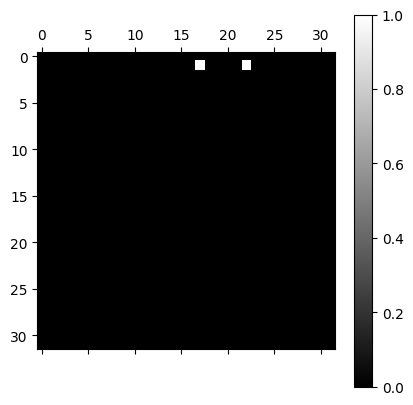

In [77]:
plt.matshow(test_env.food, cmap='gray')
plt.colorbar()

In [180]:
import encasm
reload(encasm)
import encasm.eval
reload(encasm.eval)
from encasm.eval import load_tests

data_dir = "./encasm/example_networks/"
test_envs = load_tests(folder = data_dir)

In [193]:
import encasm.env
reload(encasm.env)
from encasm.env import PetriDish


In [195]:
# test_envs["small"]['3']['1'].display()
tenv = PetriDish.from_env("tenv", test_envs["small"]['3']['1'])

In [163]:
a = np.arange(0, 100, 1).reshape(10,10)
b = a[1:-1, 1:-1]
a[:-2,1:-1] + a[1:-1, :-2] + a[1:-1, 2:] + a[2:, 1:-1]

array([[ 44,  48,  52,  56,  60,  64,  68,  72],
       [ 84,  88,  92,  96, 100, 104, 108, 112],
       [124, 128, 132, 136, 140, 144, 148, 152],
       [164, 168, 172, 176, 180, 184, 188, 192],
       [204, 208, 212, 216, 220, 224, 228, 232],
       [244, 248, 252, 256, 260, 264, 268, 272],
       [284, 288, 292, 296, 300, 304, 308, 312],
       [324, 328, 332, 336, 340, 344, 348, 352]])

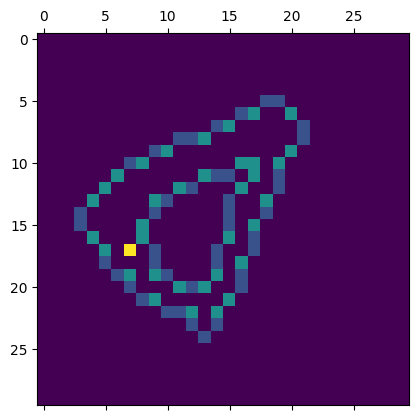

In [209]:
# Represents how many life neighbors an empty cell has
neighs = tenv.life[:-2,1:-1] + tenv.life[1:-1, :-2] + tenv.life[1:-1, 2:] + tenv.life[2:, 1:-1] + tenv.life[1:-1, 1:-1]*100
neighs[neighs>100] = 0
plt.matshow(neighs)
# a = np.zeros_like(neighs)
# a[neighs>100] = 1
# plt.matshow(a)

81.0
81.0


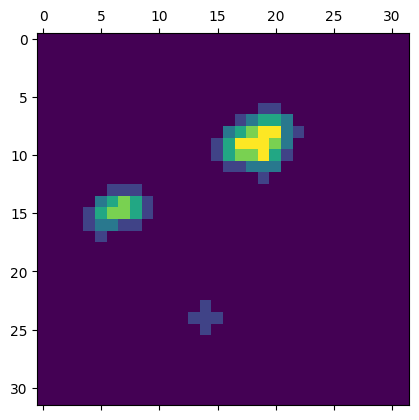

In [215]:
import scipy.signal as signal

kernel = np.array([[0,0.2,0],[0.2,0.2,0.2],[0,0.2,0]])

# applies a 2d convolution to the grid using scipy and the given kernel
def convolve(grid, kernel):
    return signal.convolve2d(grid, kernel, mode='same', boundary='wrap')

tenv.resv += tenv.food
print(tenv.resv.sum())
grid = convolve(tenv.resv, kernel)
print(grid.sum())

plt.matshow(grid)

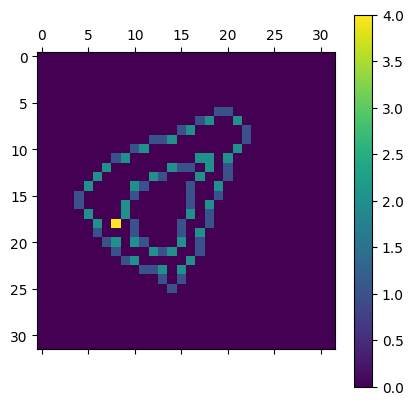

In [223]:
kernel = np.array([[0,1,0],[1,100,1],[0,1,0]])
edges = convolve(tenv.life, kernel)
edges[edges>100] = 0
plt.matshow(edges)
plt.colorbar()

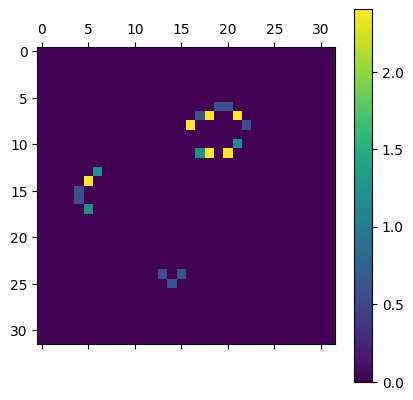

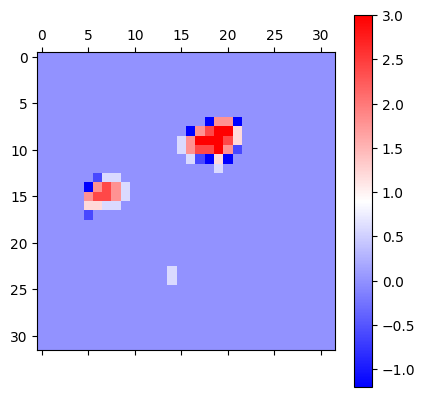

In [229]:
plt.matshow(edges*grid)
plt.colorbar()
plt.matshow(edges*grid*-1+grid, cmap="bwr")
plt.colorbar()


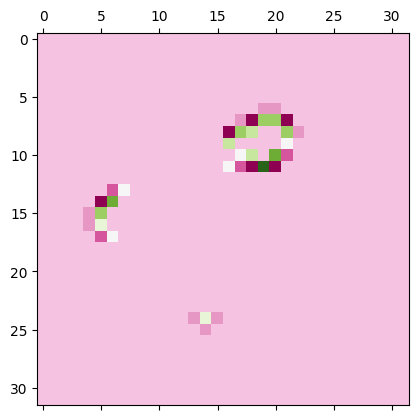

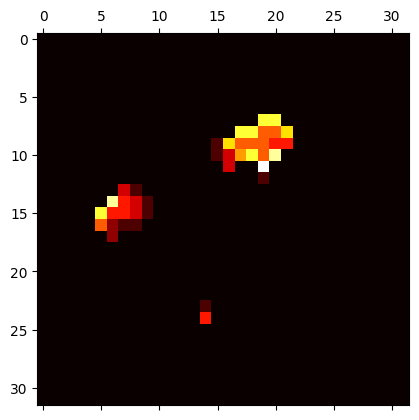

In [237]:
kernel = np.array([[0,0.2,0],[0.2,0.2,0.2],[0,0.2,0]])
plt.matshow(convolve(edges*grid*5, kernel) * tenv.life + edges*grid*-1, cmap = "PiYG")
newcombined = (grid + convolve(edges*grid*5, kernel)) * tenv.life
plt.matshow(newcombined, cmap='hot')